## Palm Movement Detection using Optical Flow

This lab is part of [AI for Beginners Curriculum](http://aka.ms/ai-beginners).

Consider [this video](palm-movement.mp4), in which a person's palm moves left/right/up/down on the stable background.

<img src="../images/palm-movement.png" width="30%" alt="Palm Movement Frame"/>

**Your goal** would be to use Optical Flow to determine, which parts of video contain up/down/left/right movements. 

Start by getting video frames as described in the lecture:

In [ ]:
# Code here
import cv2
vid = cv2.VideoCapture('palm-movement.mp4')
c = 0
frames = []
while vid.isOpened():
    ret, frame = vid.read()
    if not ret:
        break
    frames.append(frame)
    c+=1
vid.release()

Now, calculate dense optical flow frames as described in the lecture, and convert dense optical flow to polar coordinates: 

In [ ]:
# Code here

import cv2
import matplotlib.pyplot as plt
import numpy as np

def display_images(l,titles=None,fontsize=12):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
        if titles is not None:
            ax[i].set_title(titles[i],fontsize=fontsize)
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()



import numpy as np
bwframes = [cv2.cvtColor(x,cv2.COLOR_BGR2GRAY) for x in frames]

flows = [cv2.calcOpticalFlowFarneback(f1, f2, None, 0.5, 3, 15, 3, 5, 1.2, 0) 
         for f1,f2 in zip(bwframes[:-1],bwframes[1:])]
# flows[0].shape
def flow_to_hsv(flow):
    hsvImg = np.zeros((flow.shape[0],flow.shape[1],3),dtype=np.uint8)
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsvImg[..., 0] = 0.5 * ang * 180 / np.pi
    hsvImg[..., 1] = 255
    hsvImg[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    return cv2.cvtColor(hsvImg, cv2.COLOR_HSV2BGR)

start = bwframes[0]
stop = bwframes[-1]
# print(start)

frms = [flow_to_hsv(x) for x in flows[0:-1]]
print(frms[25].shape)

display_images(frms[::25])

Build histogram of directions for each of the optical flow frame. A histogram shows how many vectors fall under certain bin, and it should separate out different directions of movement on the frame.

> You may also want to zero out all vectors whose magnitude is below certain threshold. This will get rid of small extra movements in the video, such as eyes and head.

Plot the histograms for some of the frames.

In [ ]:
# Code here

# for frame in frms:
def calc_histogram(frame):
    
    
    
    # rgb_img = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    hist_b = cv2.calcHist([frame],[0],None,[256],[0,256])
    hist_g = cv2.calcHist([frame],[1],None,[256],[0,256])
    hist_r = cv2.calcHist([frame],[2],None,[256],[0,256])
    sum_value_r = np.sum(hist_r[threshold:255]) / frame_size
    sum_value_g = np.sum(hist_g[threshold:255]) / frame_size
    sum_value_b = np.sum(hist_b[threshold:255]) / frame_size
    sum_value = np.array([sum_value_r,sum_value_g,sum_value_b])
    return sum_value
    
    

    # if not (sum_value[0] > value_threshold or sum_value[1] > value_threshold or sum_value[2] > value_threshold): 
    #     continue
def draw_histogram(frame , sum_value , value_threshold):
    # print(sum_value)
    plt.figure(figsize=(10, 5))
    # 设置横轴为RGB值，纵轴为频率
    labels = ['blue','green','red']
    # plt.bar(range(0,1), sum_value[0], color='red', alpha=0.5, label='Red')
    # plt.bar(range(0,1), sum_value[1], color='green', alpha=0.5, label='Green')
    # plt.bar(range(0,1), sum_value[2], color='blue', alpha=0.5, label='Blue')
    plt.bar(labels,sum_value,tick_label=labels , color = labels)
    plt.axhline(y=value_threshold, color='r', linestyle='-')

    plt.title('RGB Histogram')
    plt.xlabel('RGB Value ')
    plt.ylabel('Frequency')
    # plt.legend()
    
    # 显示原始图像
    plt.figure(figsize=(5, 5))
    plt.imshow(frame)
    plt.axis('off')
    plt.title('Original Image')
    
    plt.show()

Looking at histograms, it should be pretty straightforward how to determine direction of movement. You need so select those bins the correspond to up/down/left/right directions, and that are above certain threshold.

up


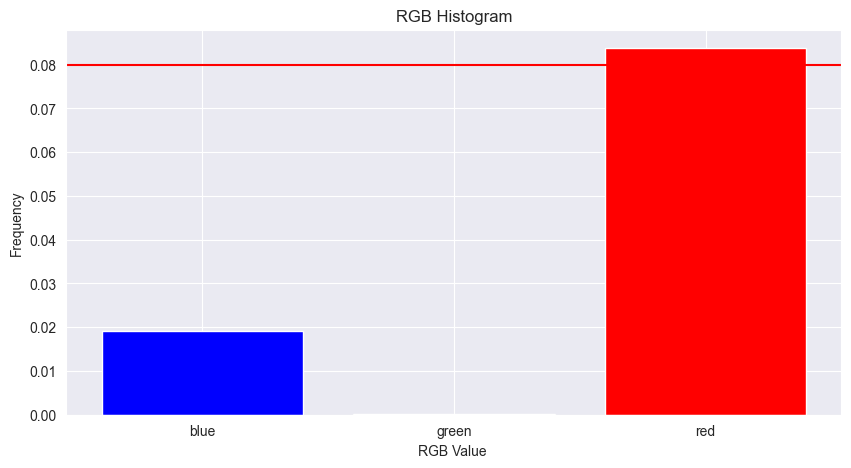

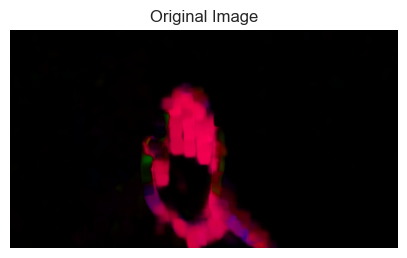

up


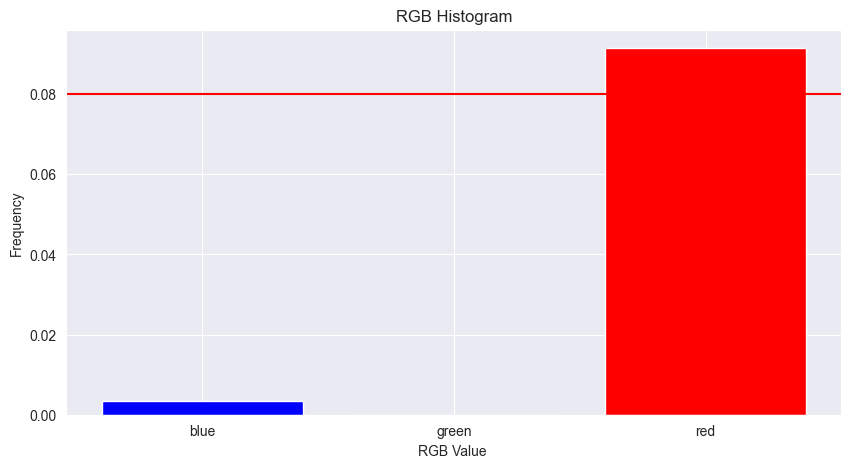

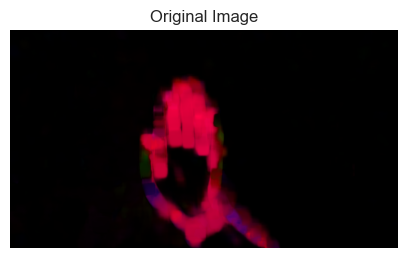

up


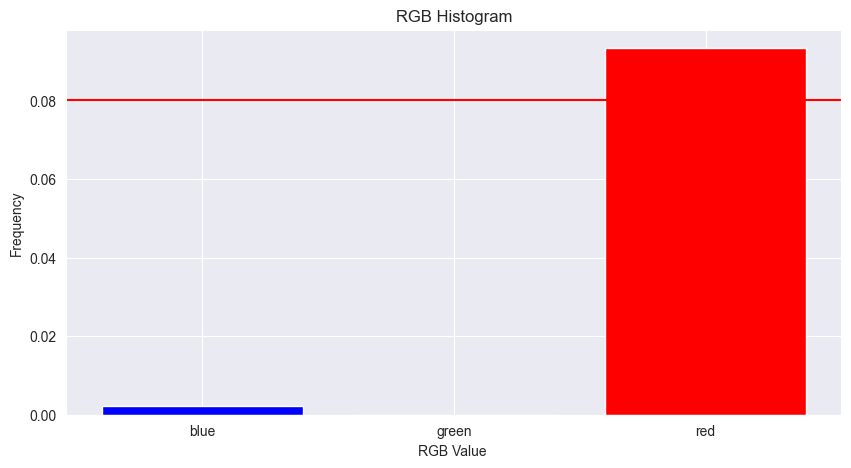

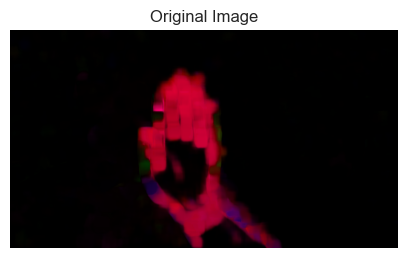

up


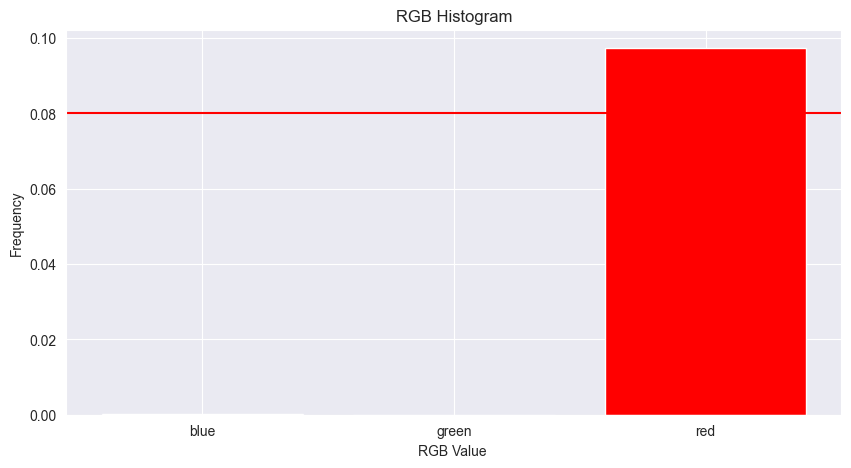

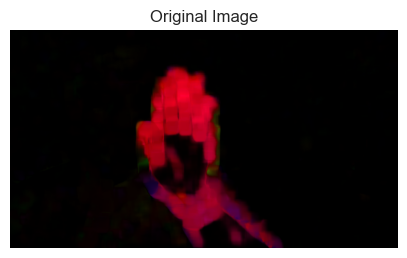

up


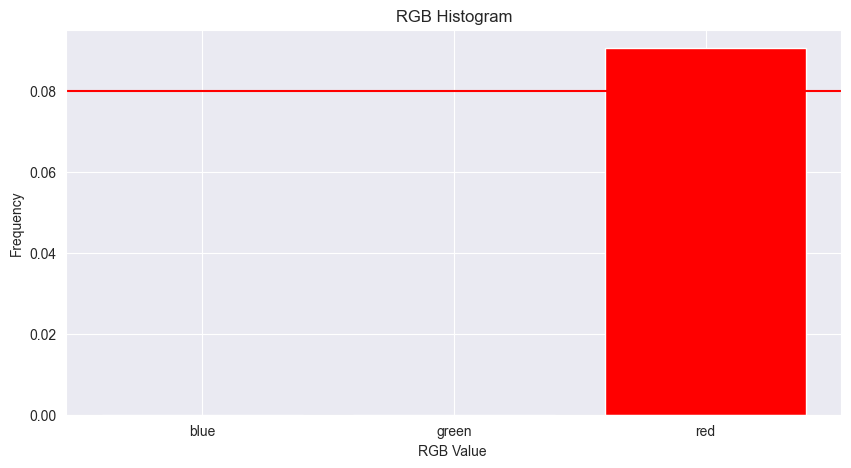

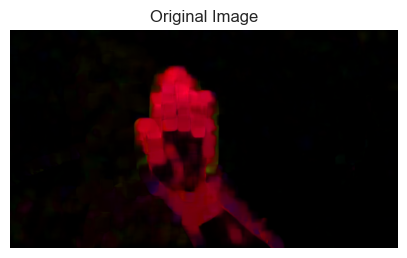

left


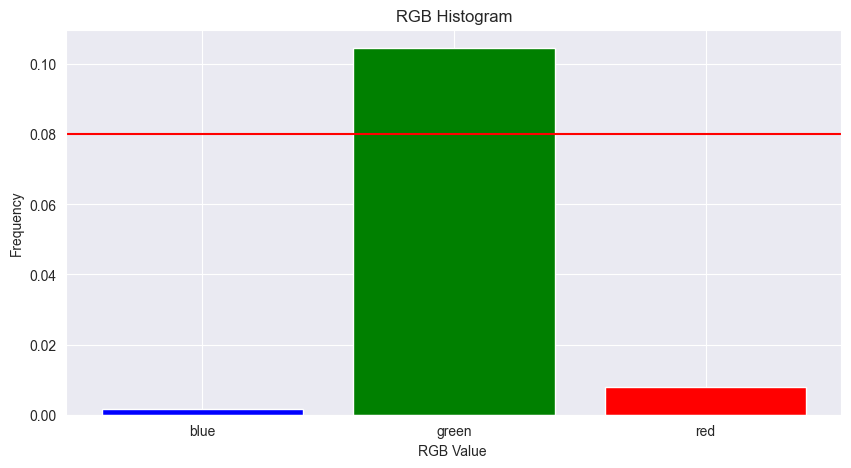

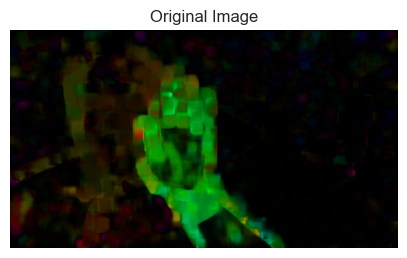

left


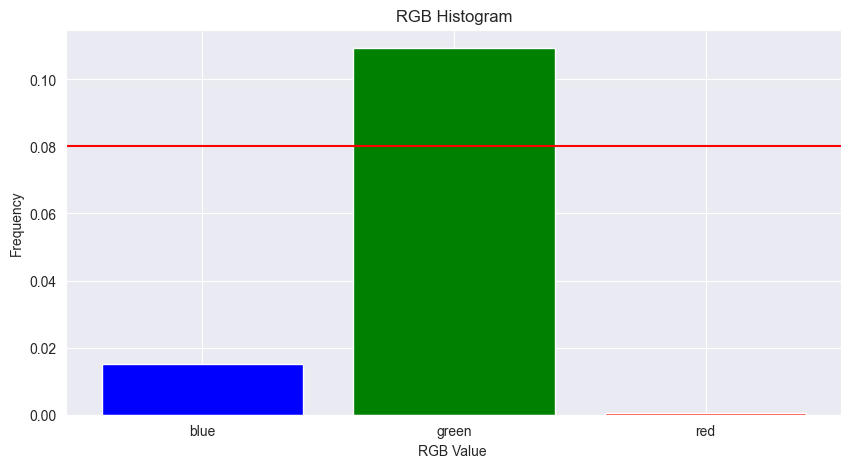

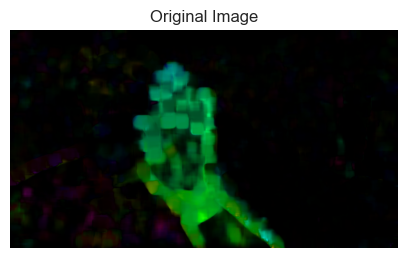

left


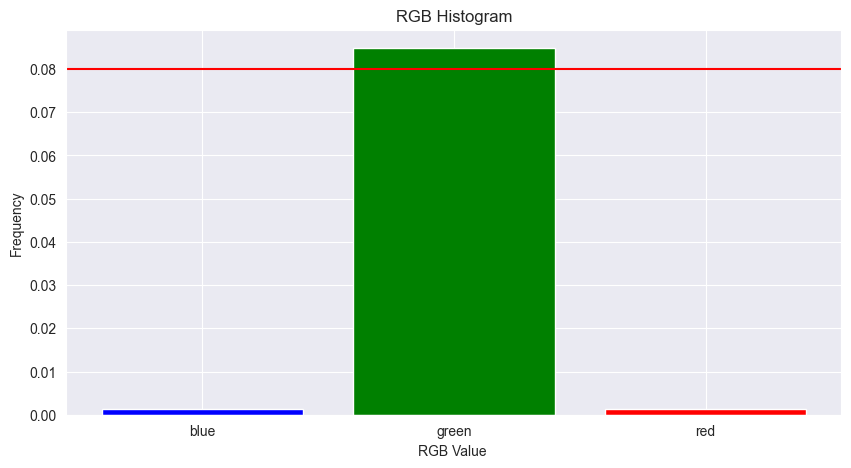

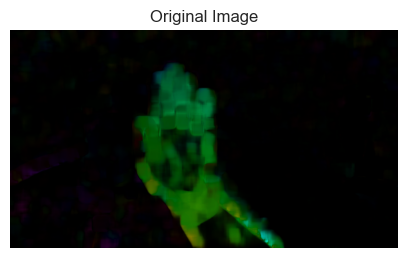

left


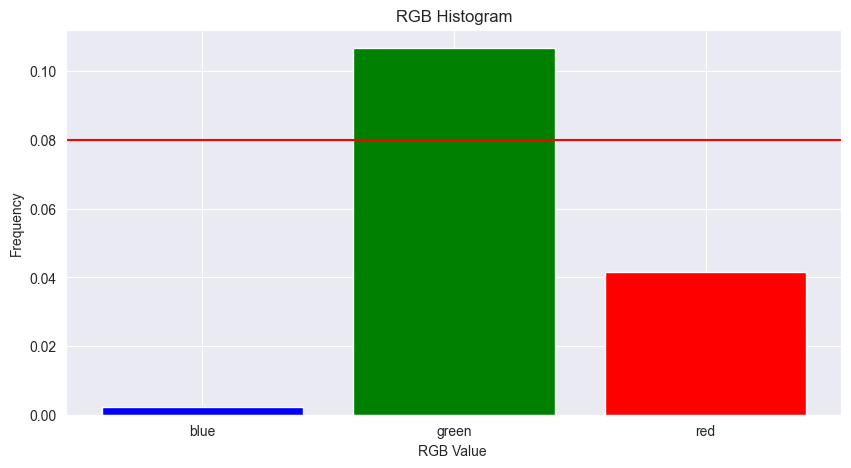

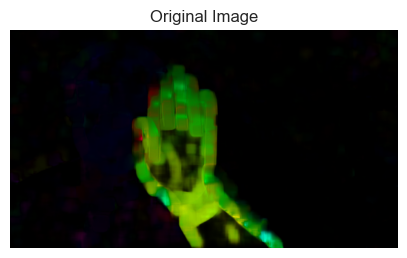

left


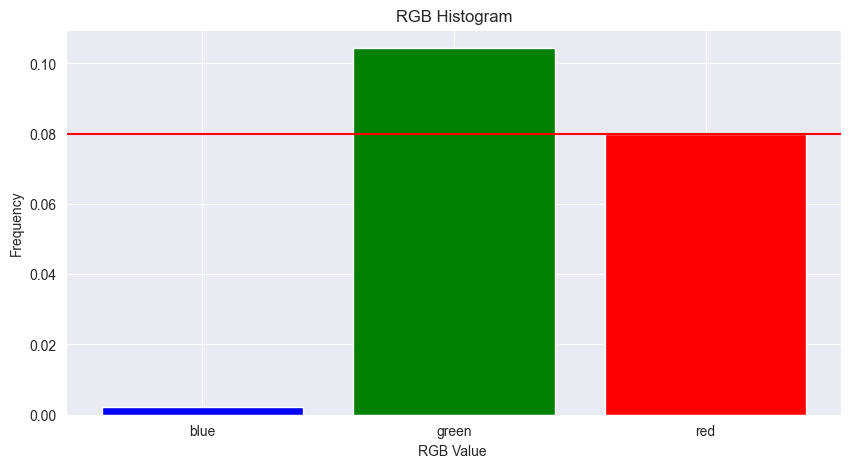

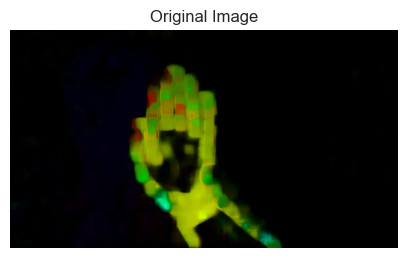

down


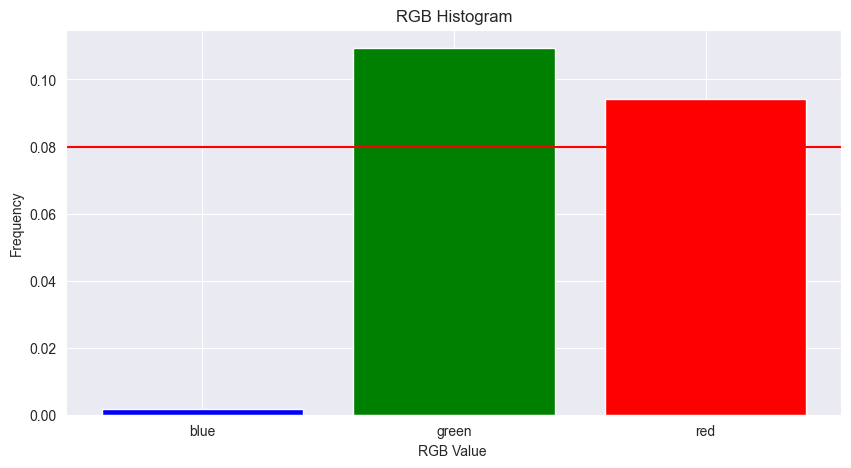

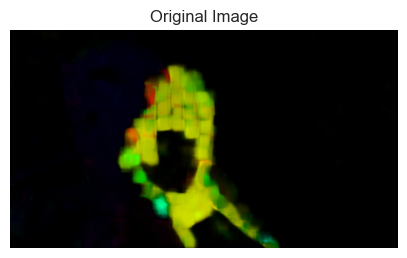

down


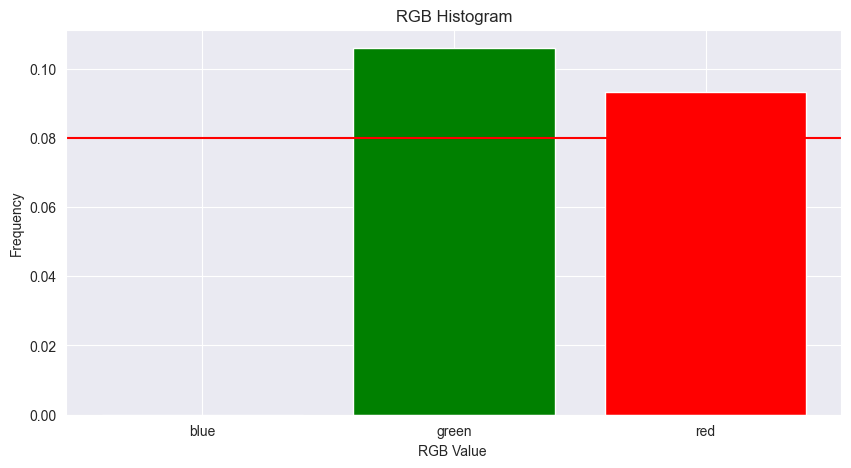

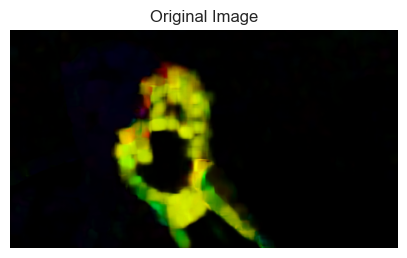

down


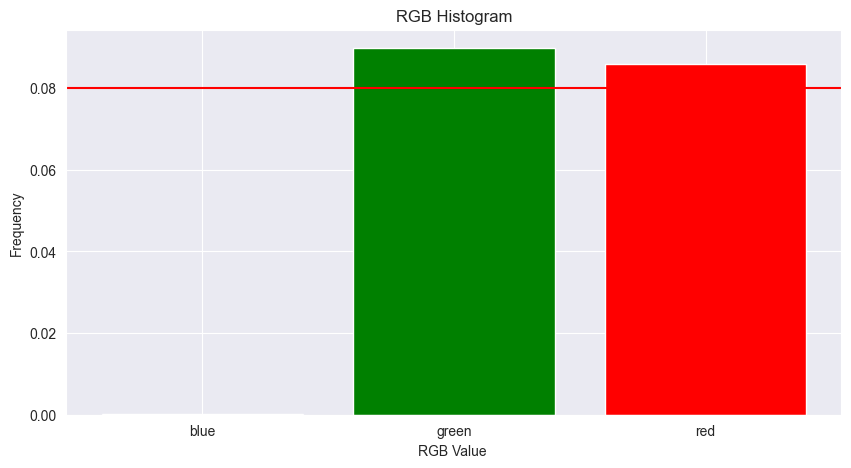

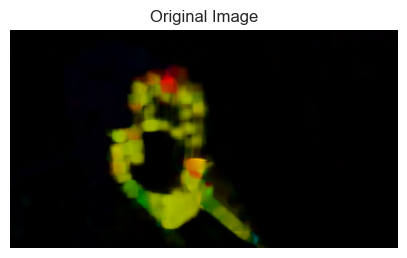

left


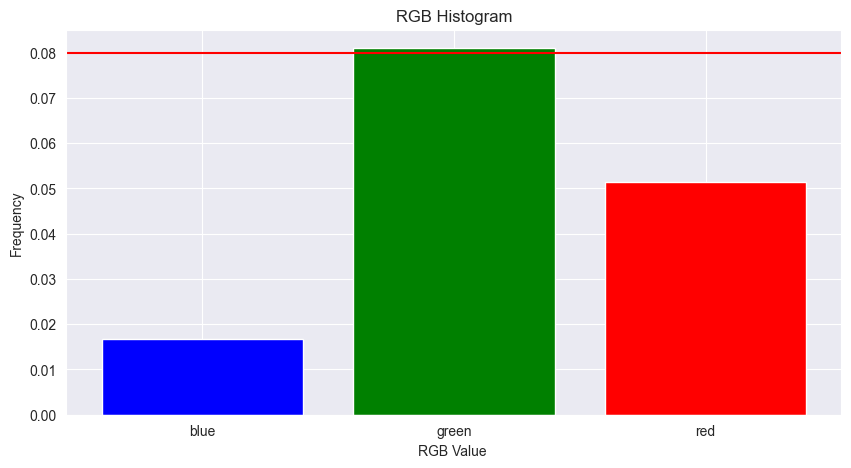

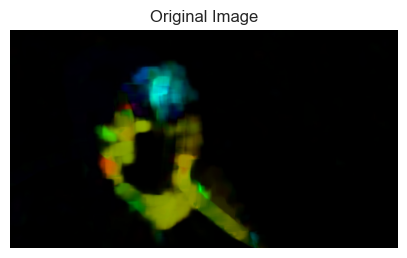

left


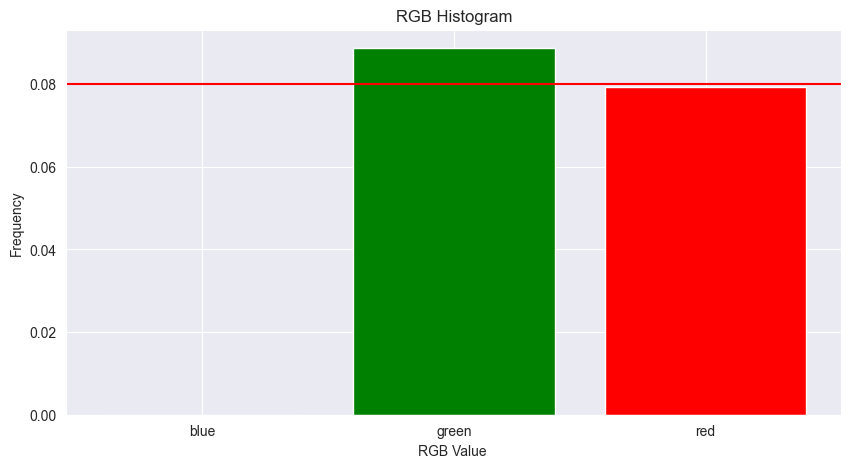

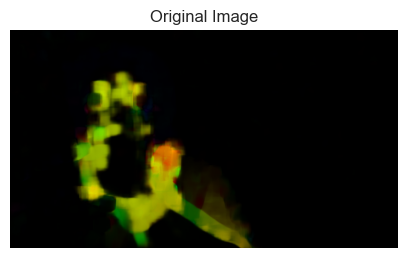

down


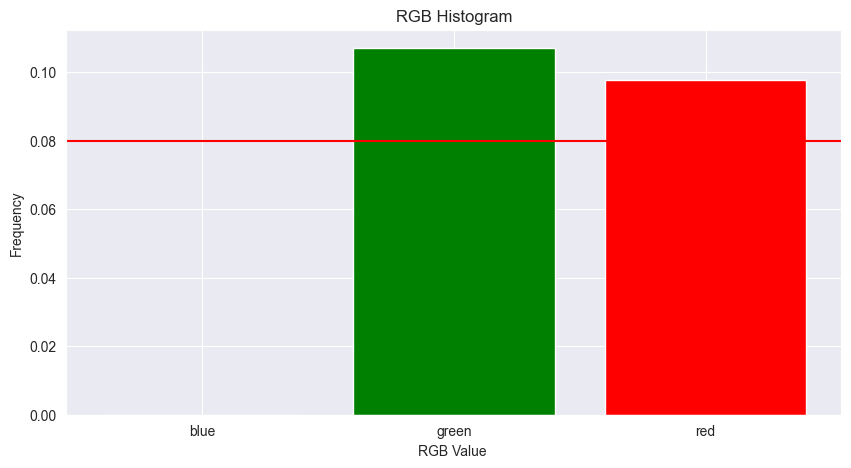

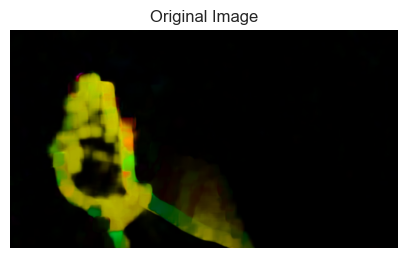

down


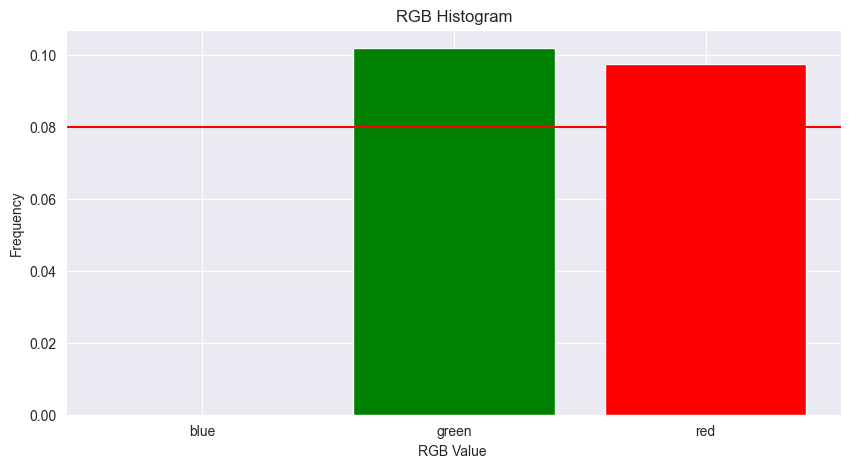

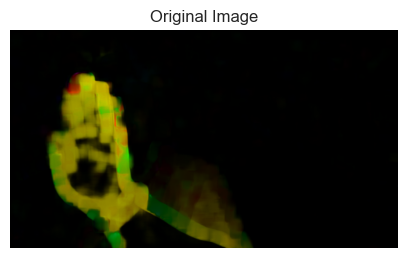

down


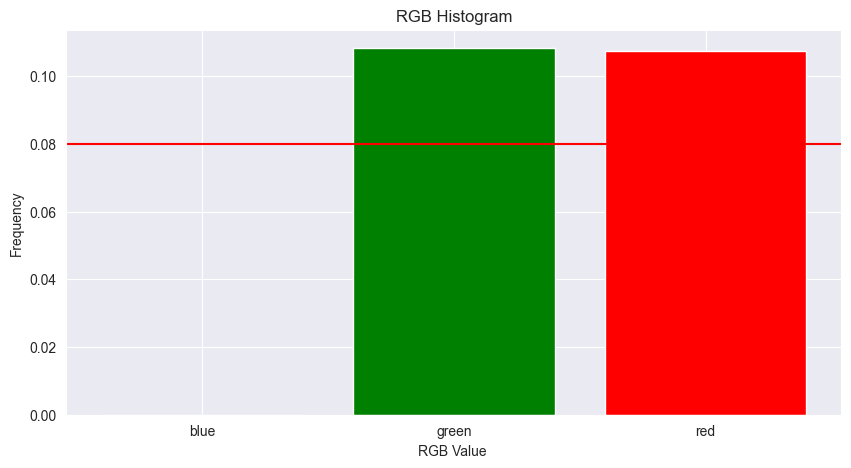

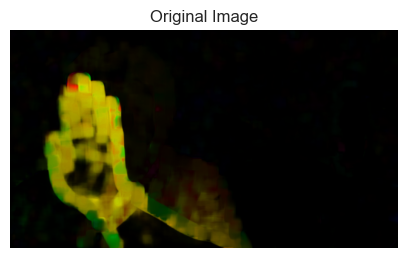

down


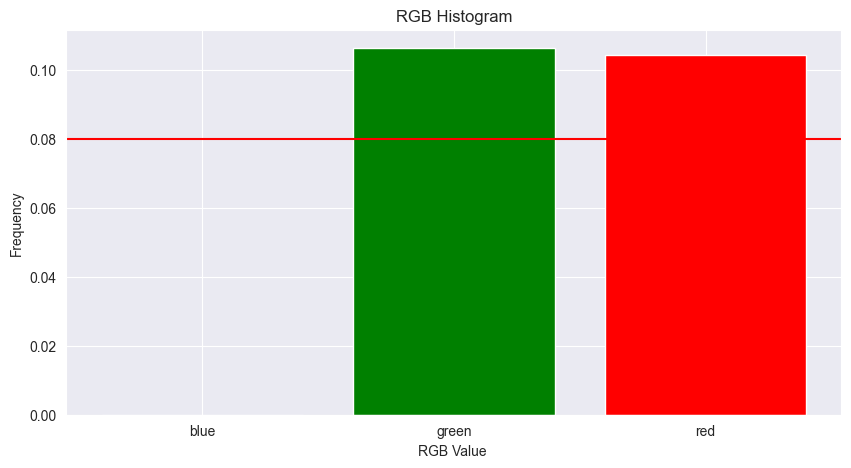

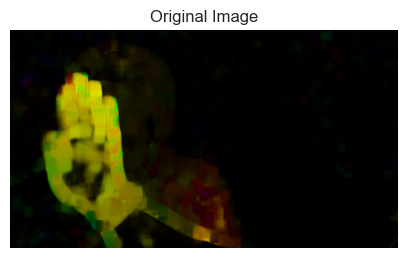

right


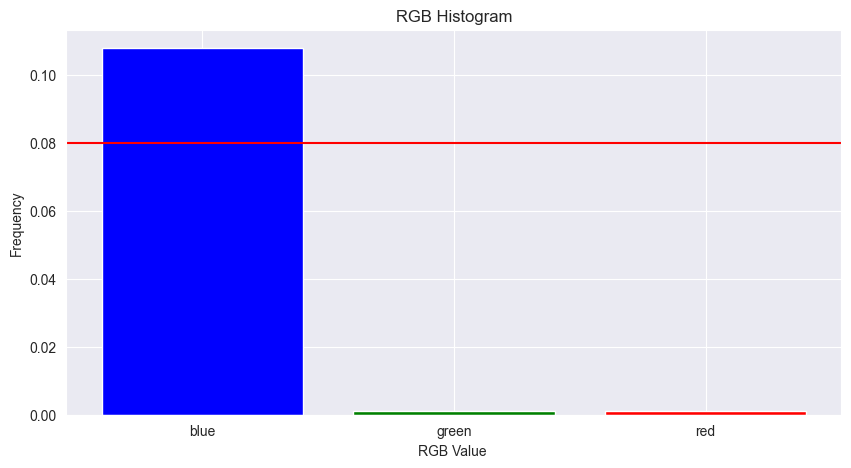

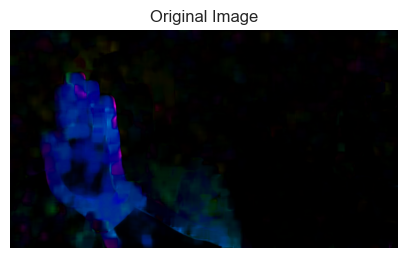

right


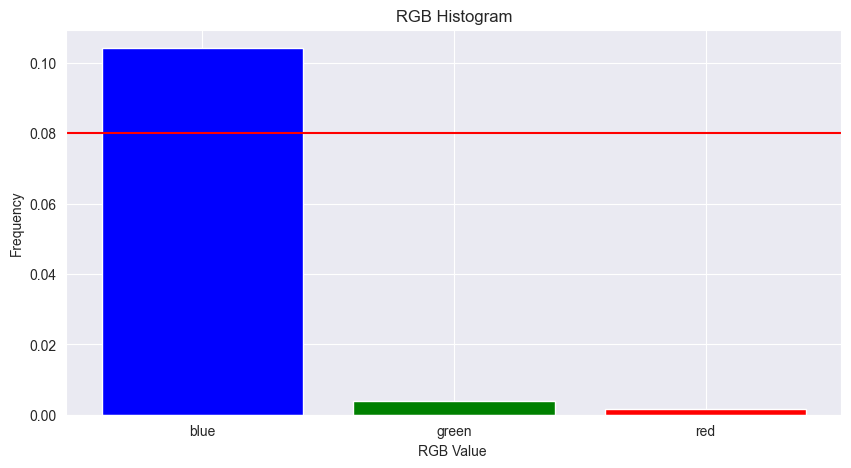

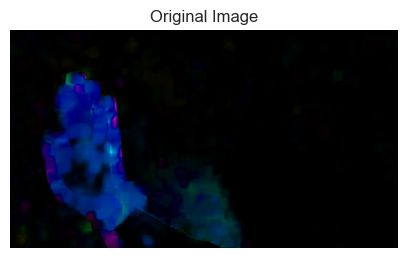

right


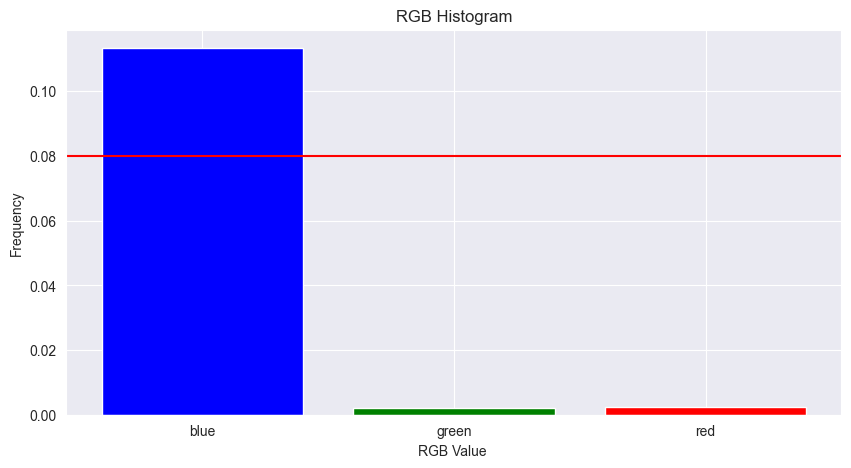

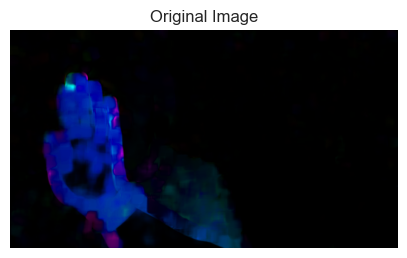

right


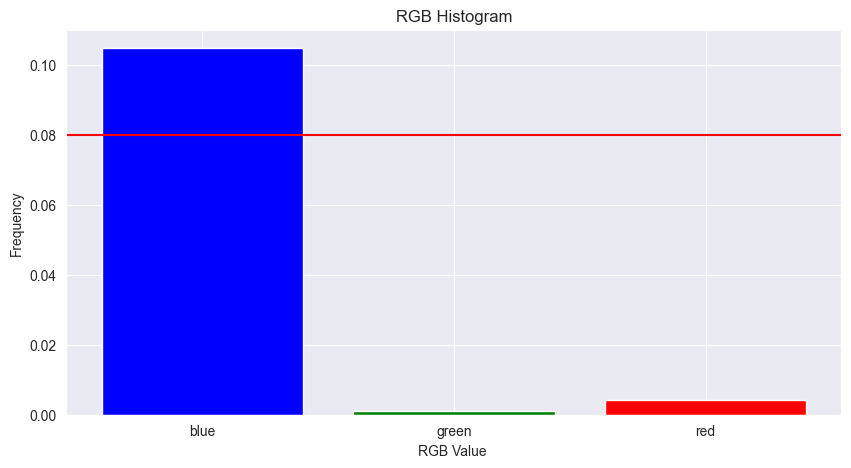

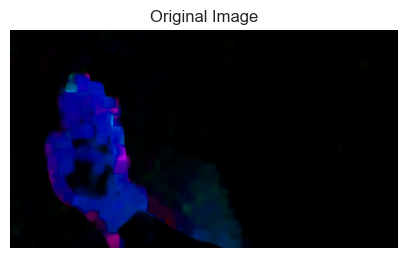

right


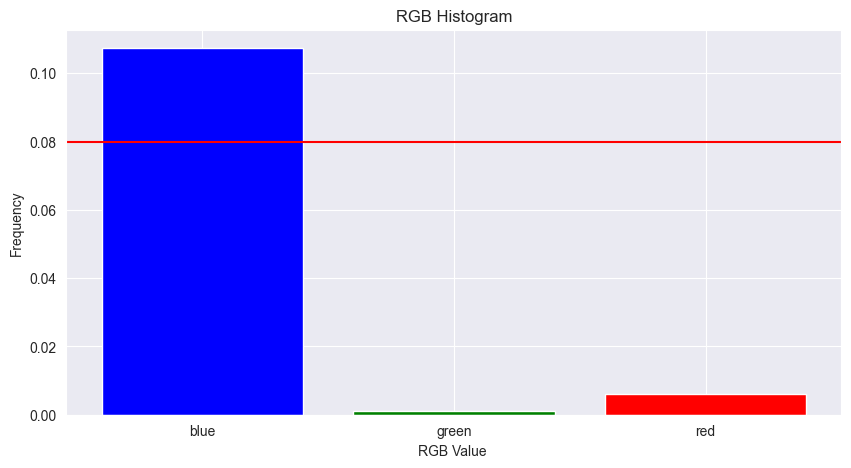

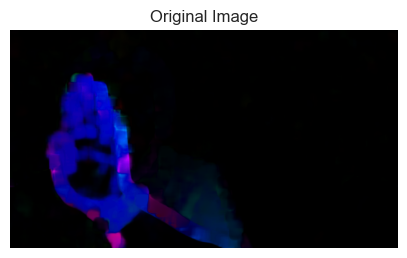

right


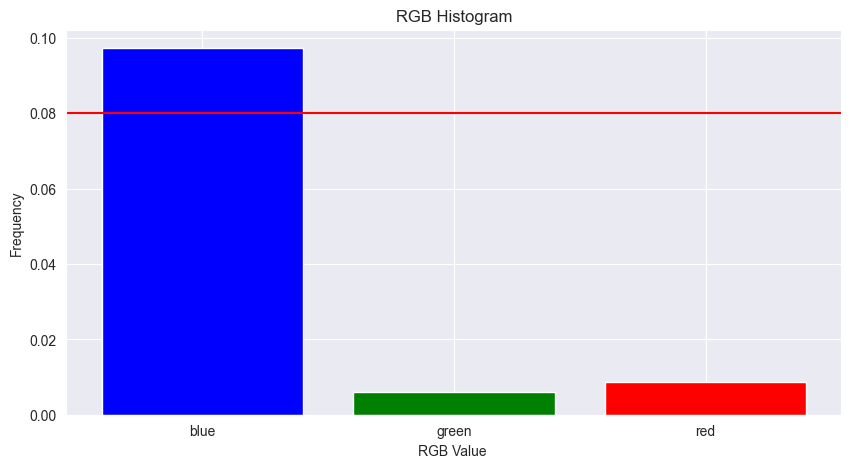

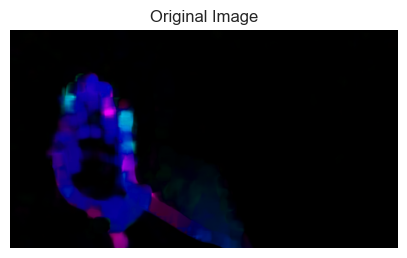

right


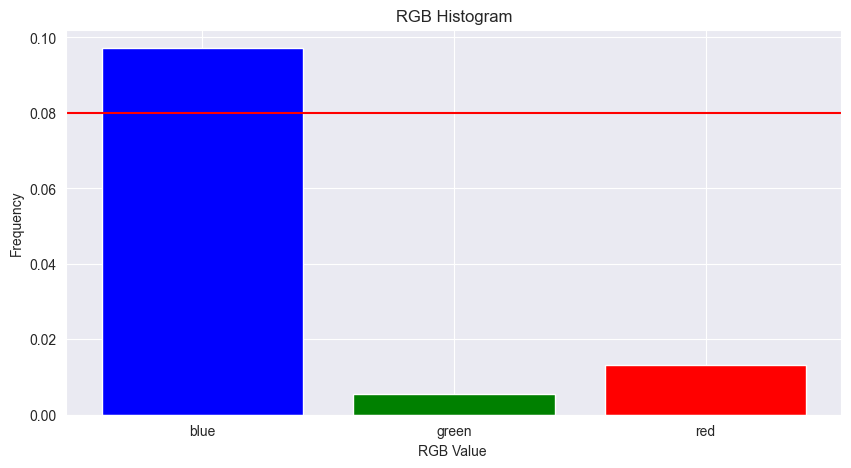

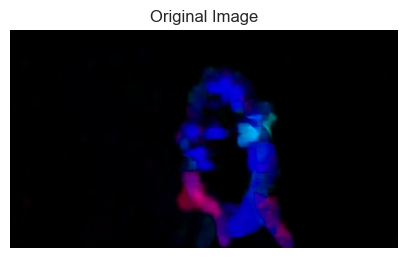

right


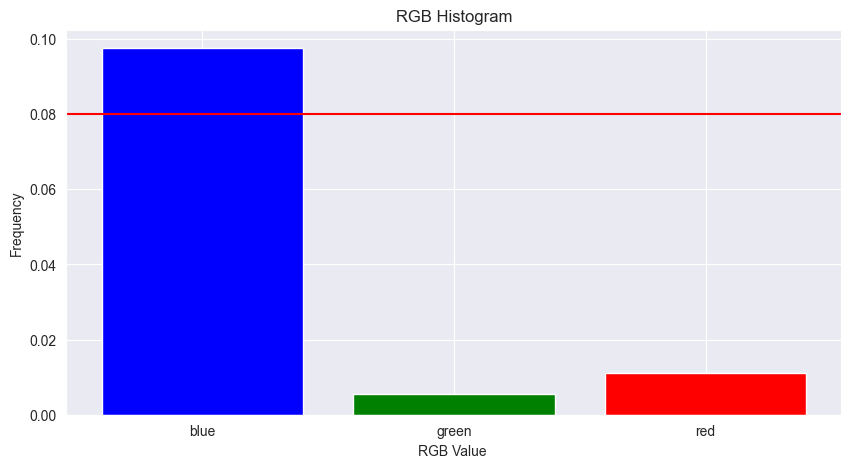

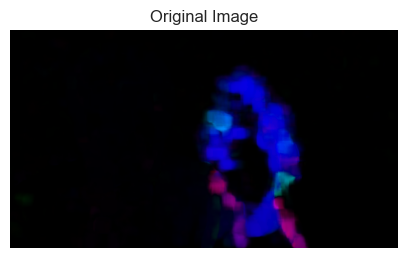

right


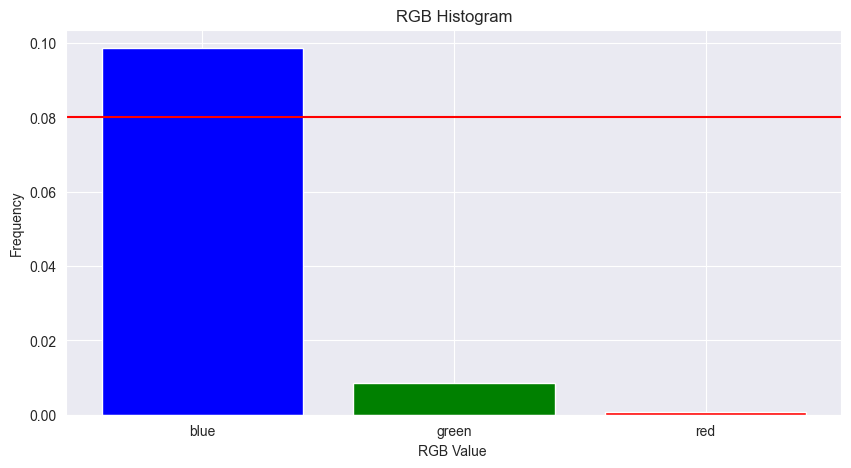

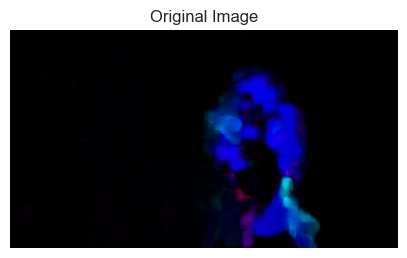

right


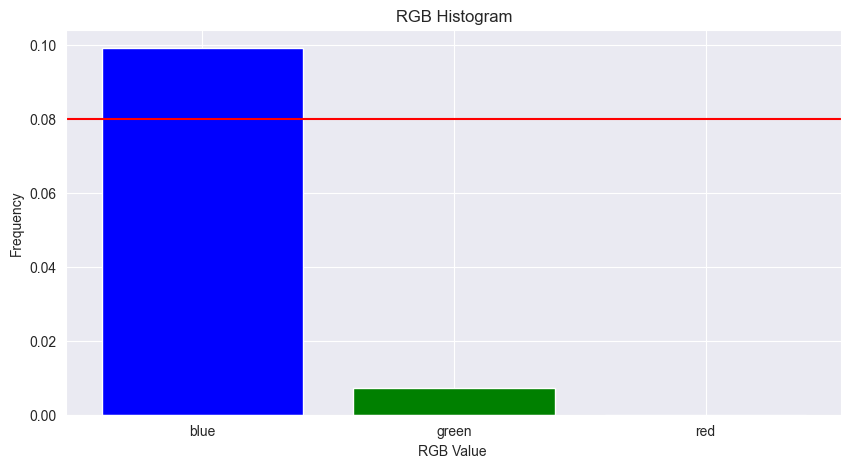

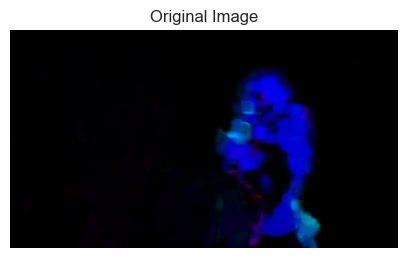

right


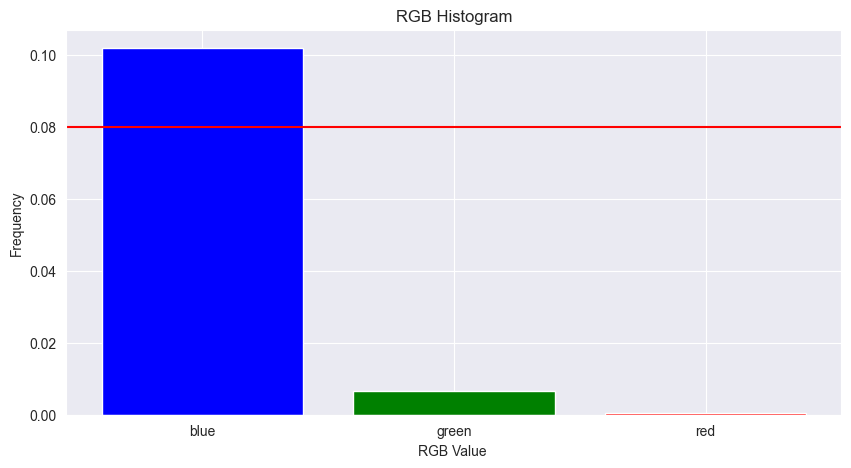

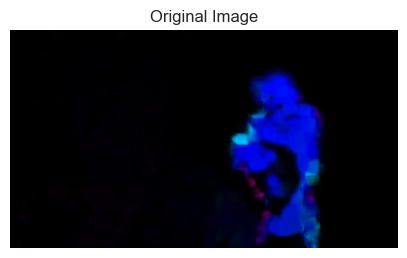

right


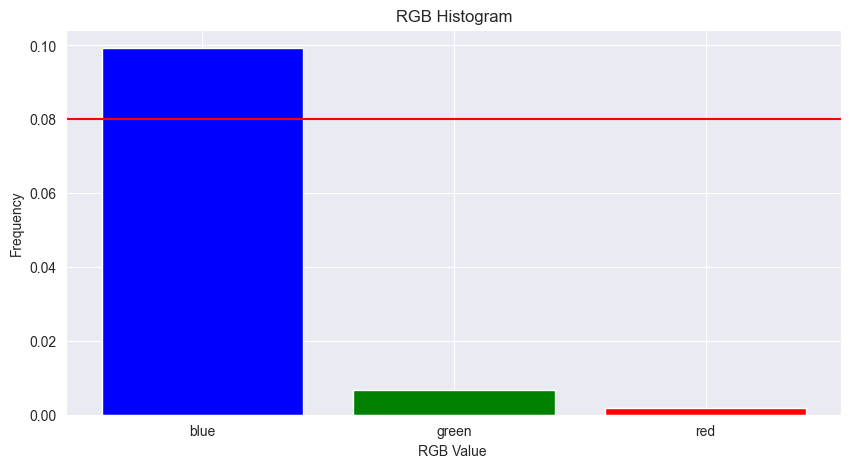

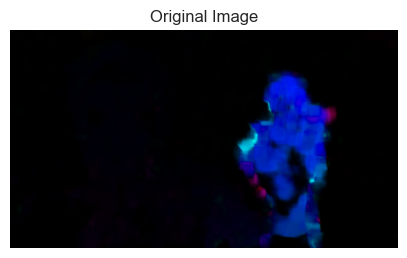

right


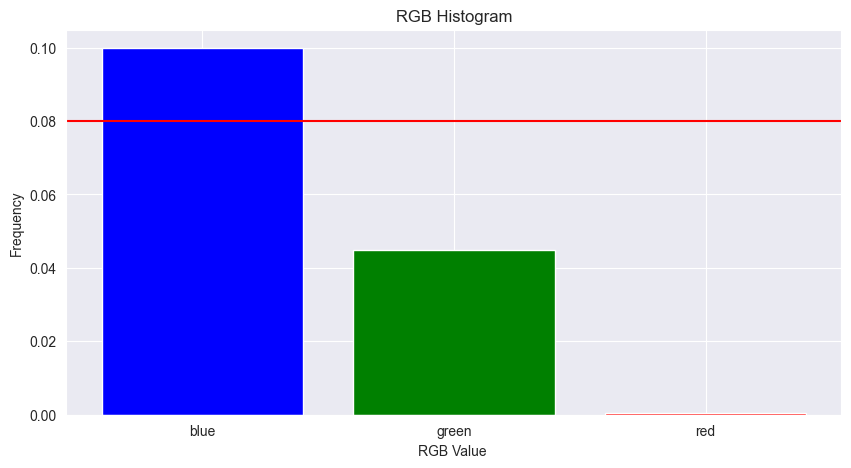

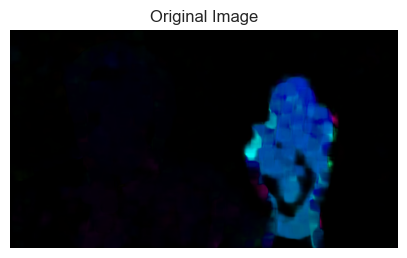

left


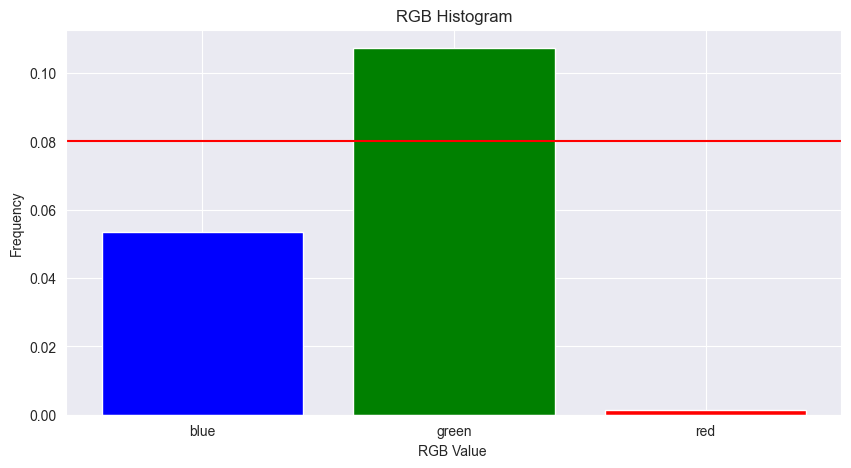

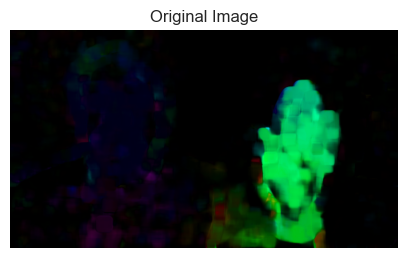

up


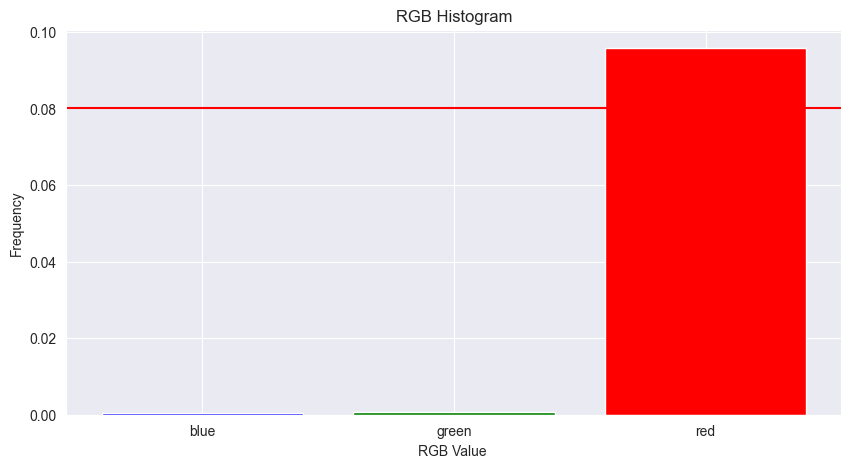

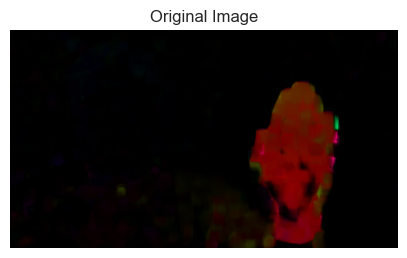

up


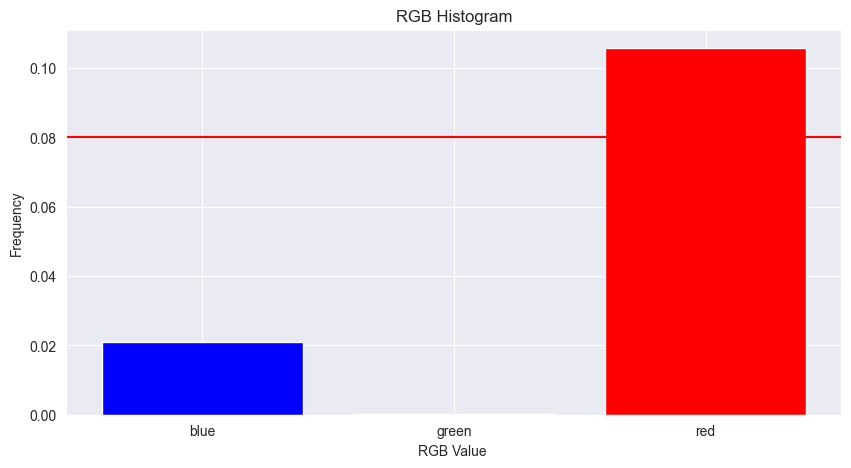

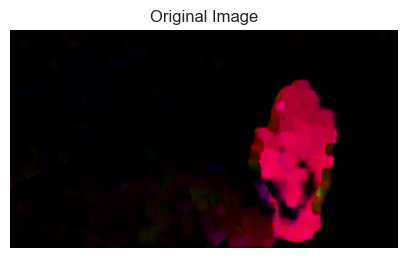

up


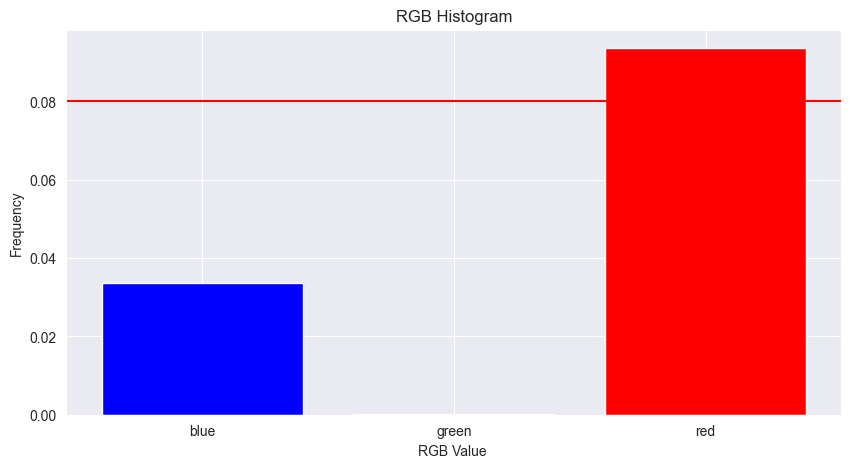

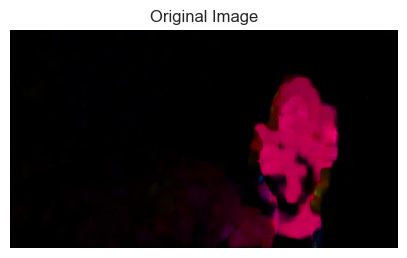

up


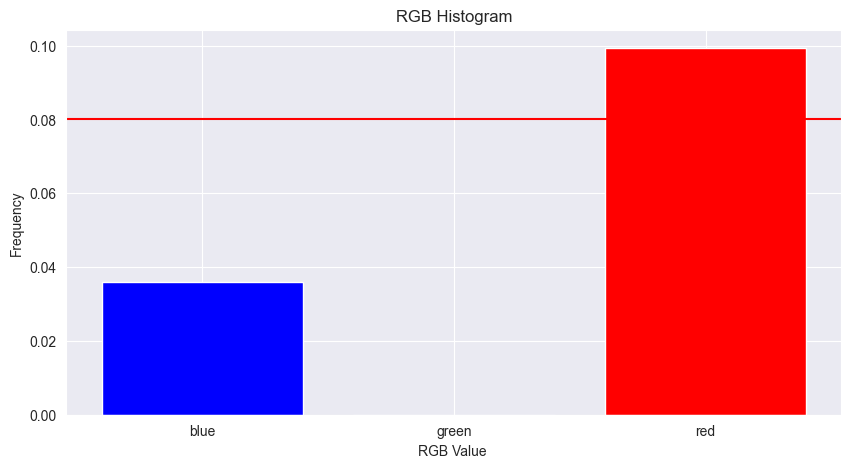

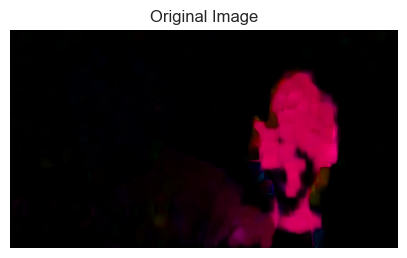

up


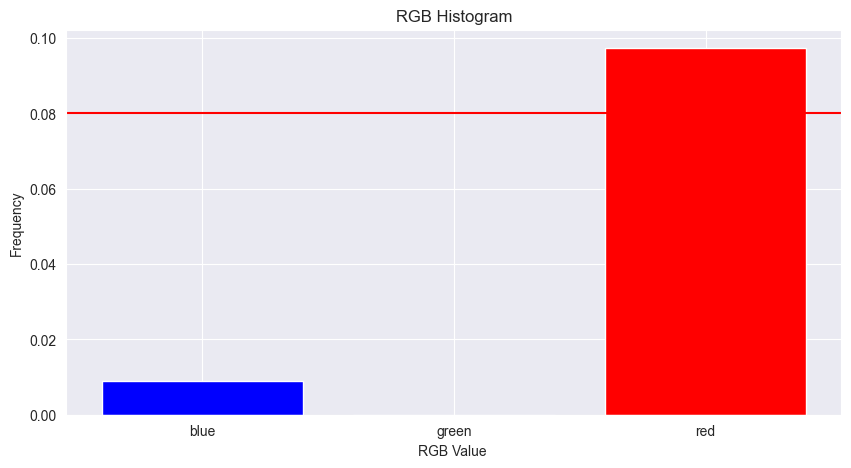

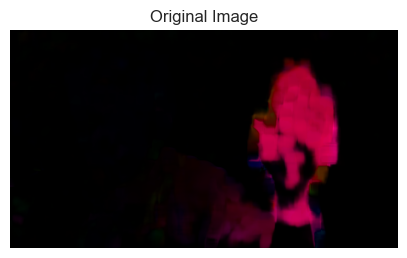

up


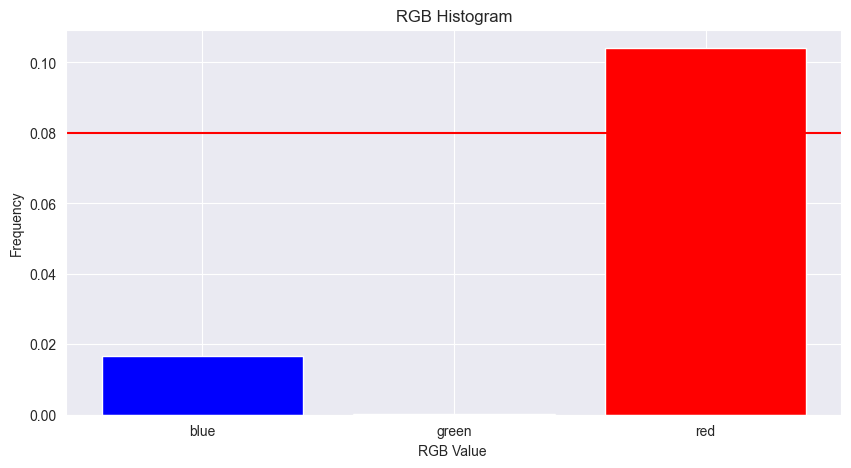

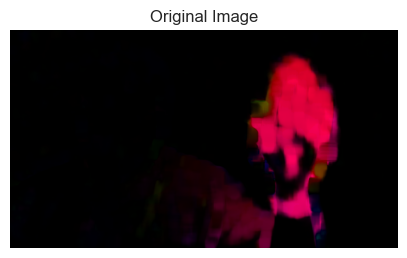

up


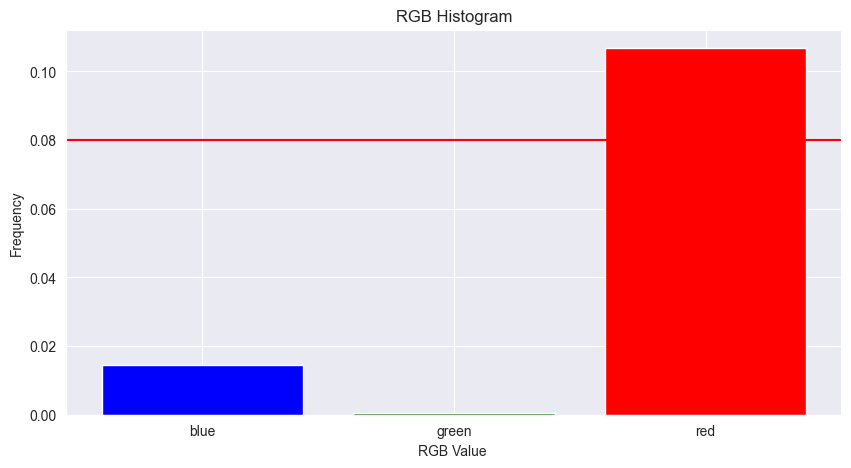

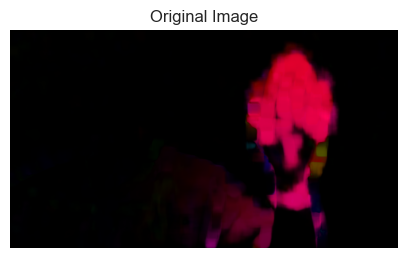

up


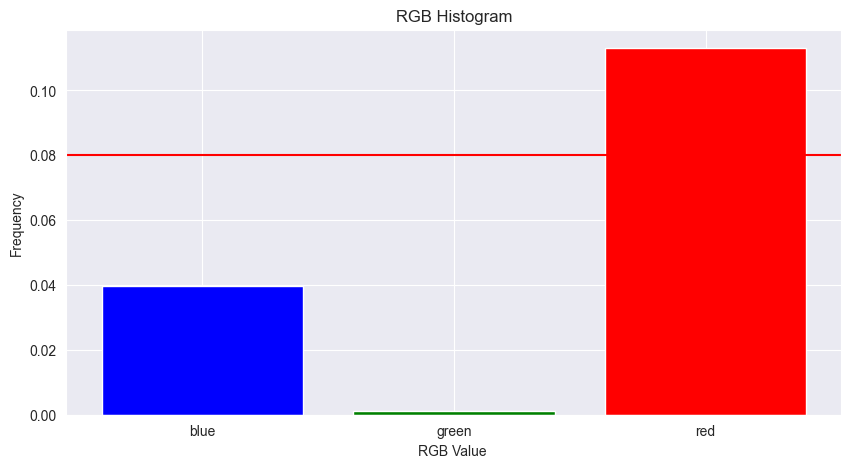

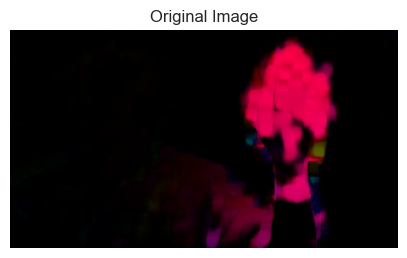

up


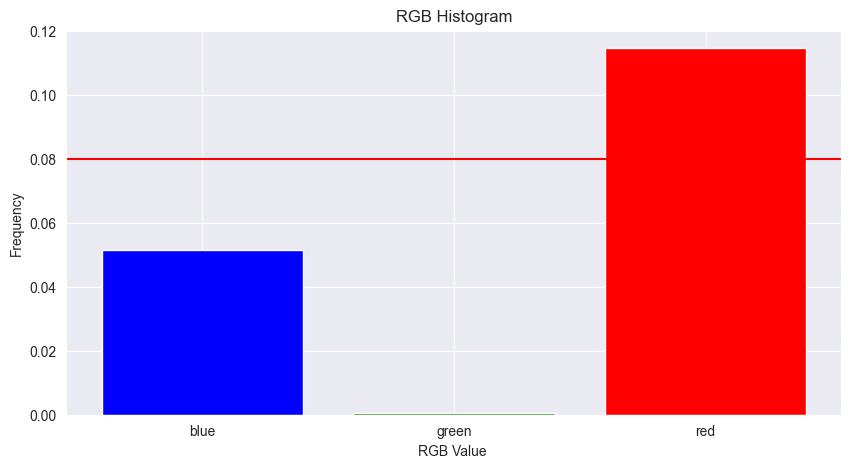

KeyboardInterrupt: 

In [47]:
# Code here

def get_direction_encode(sum_value , threshold):
    h_blue = 1 if sum_value[0] > threshold else 0
    h_green = 1 if sum_value[1] > threshold else 0
    h_red = 1 if sum_value[2] > threshold else 0
    
    
    if h_red == 1 and h_green == 1:
        return 'down'
    if h_red == 1 and h_green == 0:
        return 'up'
    if h_blue == 1 :
        return 'right'
    if h_green == 1 :
        return 'left'
    
    return None

threshold = 75
frame_size = 360 * 640
value_threshold = 0.08

for frm in frms:
    histogram_vec = calc_histogram(frm)
    dir = get_direction_encode(histogram_vec , value_threshold)
    if dir is not None:
        print(dir)
        draw_histogram(frm , histogram_vec , value_threshold)